In [1]:
import pandas as pd 
df = pd.read_csv("用户浏览数据.csv")


articles = []
for i in df['文章类型']:
    article = i.split(',')
    articles.append(article)

In [4]:

from apyori import apriori
rules = apriori(articles,min_support=0.1,min_confidence=0.6)

In [8]:
extract_result = []

for rule in rules:
    support = round(rule.support,3)
    for i in rule.ordered_statistics:
        head_set = list(i.items_base)
        tail_set = list(i.items_add)
        if head_set == []:
            continue
        related_category = str(head_set) + '→' + str(tail_set)
        confidence = round(i.confidence,3)
        lift = round(i.lift,3)
        extract_result.append([related_category, support, confidence, lift])

In [11]:

rule_data = pd.DataFrame(extract_result, columns=['关联规则', '支持度', '置信度', '提升度'])

promoted_rules = rule_data[rule_data['提升度']>1]

restricted_rules = rule_data[rule_data['提升度']<1]

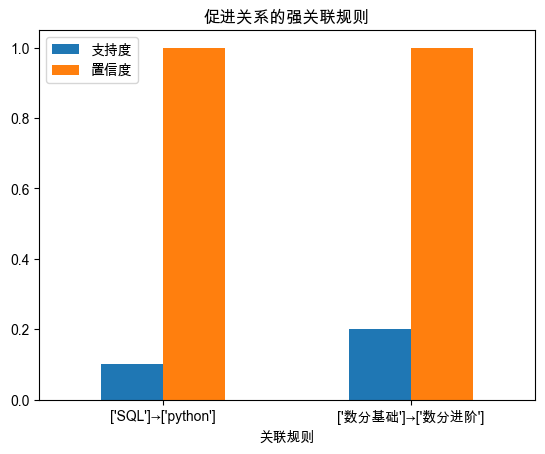

In [12]:
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = "Arial Unicode MS"

promoted_rules.plot.bar("关联规则",["支持度","置信度"],rot=0)

plt.title("促进关系的强关联规则")

plt.show()